In [1]:
library(dplyr)
install.packages("ggplot2")
library(ggplot2)
install.packages("ggmap")
library(ggmap)

files <- list.files("Ecuador/GACETA-ZIKA/data")
all <- rep(list(NA),length(files))

for(i in 1:length(files)){
  f <- read.csv(paste("Ecuador/GACETA-ZIKA/data/",files[i],sep=""),stringsAsFactors = F)
  all[[i]] <- f
}
Ecuador_All<-as.data.frame(do.call(rbind,all))
Ecuador_province<-filter(Ecuador_All,location_type=="province")
Ecuador_manabi<-Ecuador_All[substr(Ecuador_All$location,1, 15)=="Ecuador-Manabi-",]


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpHEdEUl/downloaded_packages

The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpHEdEUl/downloaded_packages


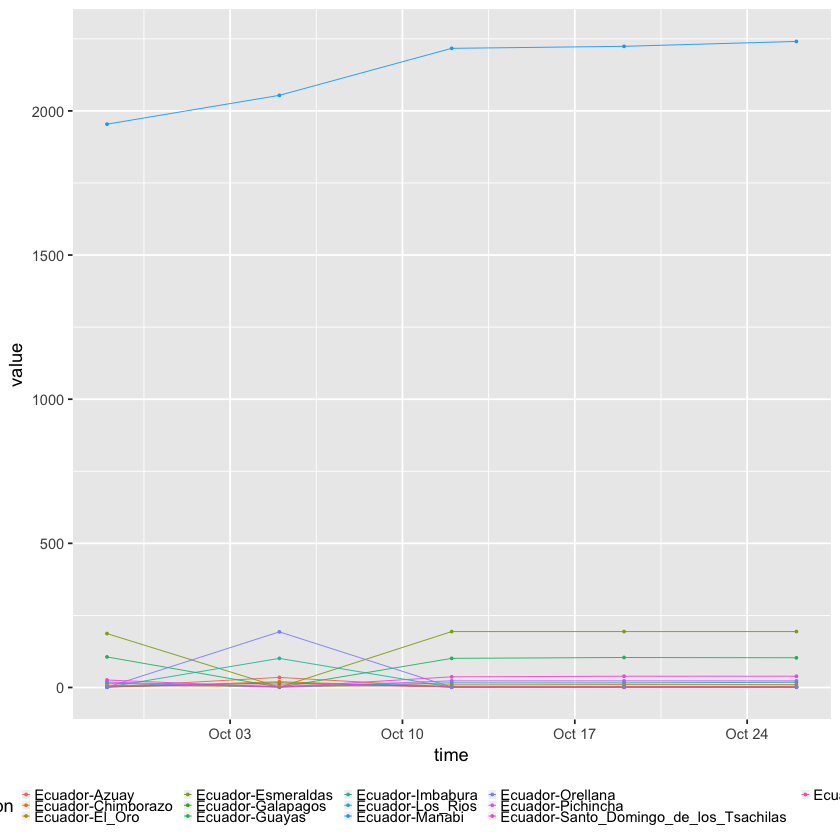

In [2]:
Ecuador_province$time <- as.Date(Ecuador_province$"report_date")
ggplot(data=subset(Ecuador_province,data_field_code %in% c("EC0003"))
             ,aes(x=time,y=value)) +
    geom_line(aes(colour=location),size=.25) + 
    geom_point(aes(colour=location),size=.4) +
    theme(legend.key.size = unit(.2, "cm"),legend.position = 'bottom')

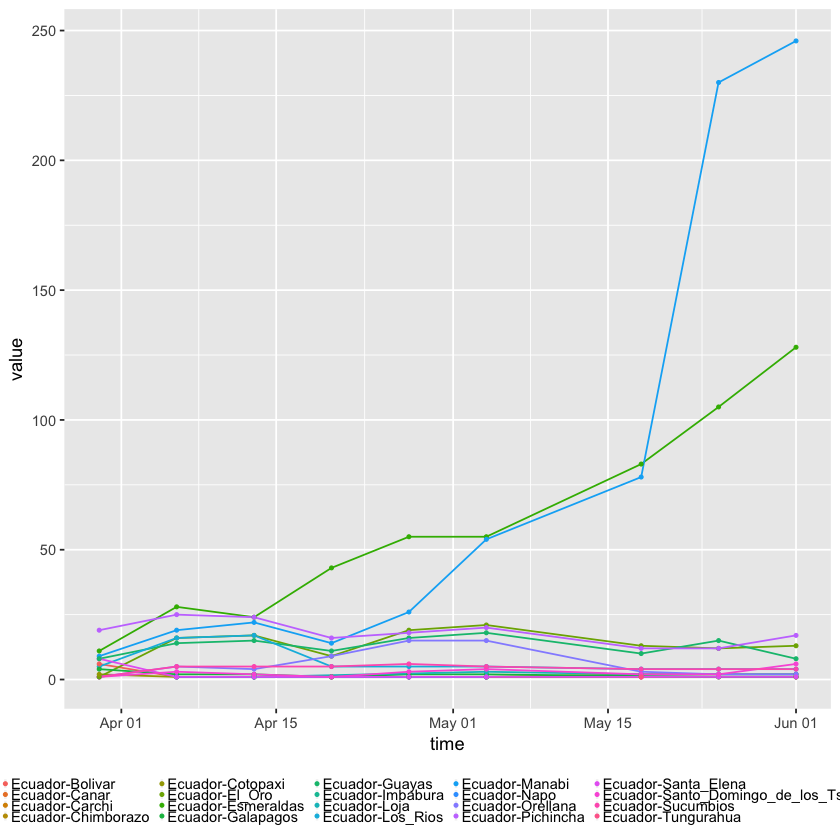

In [3]:
ggplot(data=subset(Ecuador_province,data_field_code %in% c("EC0001"))
            ,aes(x=time,y=value)) +
   geom_line(aes(colour=location),size=.5) + 
   geom_point(aes(colour=location),size=.75) +
   theme(legend.key.size = unit(.09, "cm"),legend.position = 'bottom')+
  theme(legend.title = element_blank())

In [4]:
geo <- geocode(Ecuador_province$location)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Sucumbios&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Santo_Domingo_de_los_Tsachilas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Santa_Elena&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Pichincha&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Orellana&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Manabi&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Los_Rios&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Guayas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador-Galapagos

In [5]:
Ecuador_province$long <- geo[,1]
Ecuador_province$lat <- geo[,2]
Ecuador_province$Earth_long<-rep(-79.94,379)
Ecuador_province$Earth_lat<-rep(.371,379)

In [6]:
install.packages("geosphere")
library(geosphere)
install.packages("Imap")
library(Imap)


The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpHEdEUl/downloaded_packages


Loading required package: sp



The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpHEdEUl/downloaded_packages


In [7]:
Ecuador_province$distance<-gdist(lon.1 =Ecuador_province$long ,lat.1 = Ecuador_province$lat,
                                 lon.2 = Ecuador_province$Earth_long, lat.2 = Ecuador_province$Earth_lat,
                                 units="miles")

Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”

In [8]:
Ecuador_province$location2 <- sub("Ecuador-","",Ecuador_province$location)
Ecuador_provinceNew <- data.frame(Ecuador_province,population=rep(0,379))
Ecuador_provinceNew[Ecuador_province$location2=="Sucumbios",]$population<-176472
Ecuador_provinceNew[Ecuador_province$location2=="Santo_Domingo_de_los_Tsachilas",]$population<-368013
Ecuador_provinceNew[Ecuador_province$location2=="Santa_Elena",]$population<-308693
Ecuador_provinceNew[Ecuador_province$location2=="Pichincha",]$population<-2576287
Ecuador_provinceNew[Ecuador_province$location2=="Orellana",]$population<-136396
Ecuador_provinceNew[Ecuador_province$location2=="Manabi",]$population<-1369780
Ecuador_provinceNew[Ecuador_province$location2=="Los_Rios",]$population<-778115
Ecuador_provinceNew[Ecuador_province$location2=="Guayas",]$population<-3645483
Ecuador_provinceNew[Ecuador_province$location2=="Galapagos",]$population<-25124
Ecuador_provinceNew[Ecuador_province$location2=="Esmeraldas",]$population<-534092
Ecuador_provinceNew[Ecuador_province$location2=="El_Oro",]$population<-600659
Ecuador_provinceNew[Ecuador_province$location2=="Cotopaxi",]$population<-409205
Ecuador_provinceNew[Ecuador_province$location2=="Bolivar",]$population<-183641
Ecuador_provinceNew[Ecuador_province$location2=="Canar",]$population<-225184
Ecuador_provinceNew[Ecuador_province$location2=="Loja",]$population<-448966
Ecuador_provinceNew[Ecuador_province$location2=="Napo",]$population<-103697
Ecuador_provinceNew[Ecuador_province$location2=="Carchi",]$population<-164524
Ecuador_provinceNew[Ecuador_province$location2=="Imbabura",]$population<-398244
Ecuador_provinceNew[Ecuador_province$location2=="Chimborazo",]$population<-458581
Ecuador_provinceNew[Ecuador_province$location2=="Tungurahua",]$population<-504583
Ecuador_provinceNew[Ecuador_province$location2=="Azuay",]$population<-712127

In [9]:
lm2<-lm(value~distance+population,data=subset(Ecuador_provinceNew,data_field_code %in% c("EC0001")))
summary(lm2)


Call:
lm(formula = value ~ distance + population, data = subset(Ecuador_provinceNew, 
    data_field_code %in% c("EC0001")))

Residuals:
    Min      1Q  Median      3Q     Max 
-19.744 -12.090  -9.454  -0.797 226.558 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.693e+01  5.315e+00   3.185   0.0018 **
distance    -3.521e-02  1.811e-02  -1.944   0.0540 . 
population   4.512e-06  2.911e-06   1.550   0.1235   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.38 on 135 degrees of freedom
Multiple R-squared:  0.05709,	Adjusted R-squared:  0.04312 
F-statistic: 4.087 on 2 and 135 DF,  p-value: 0.01891


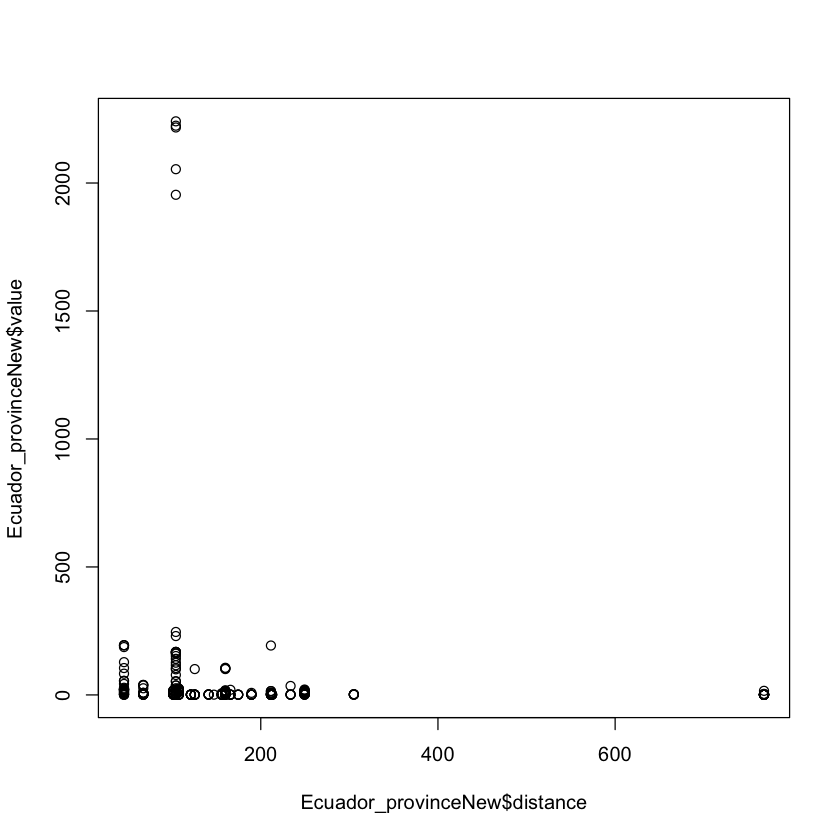

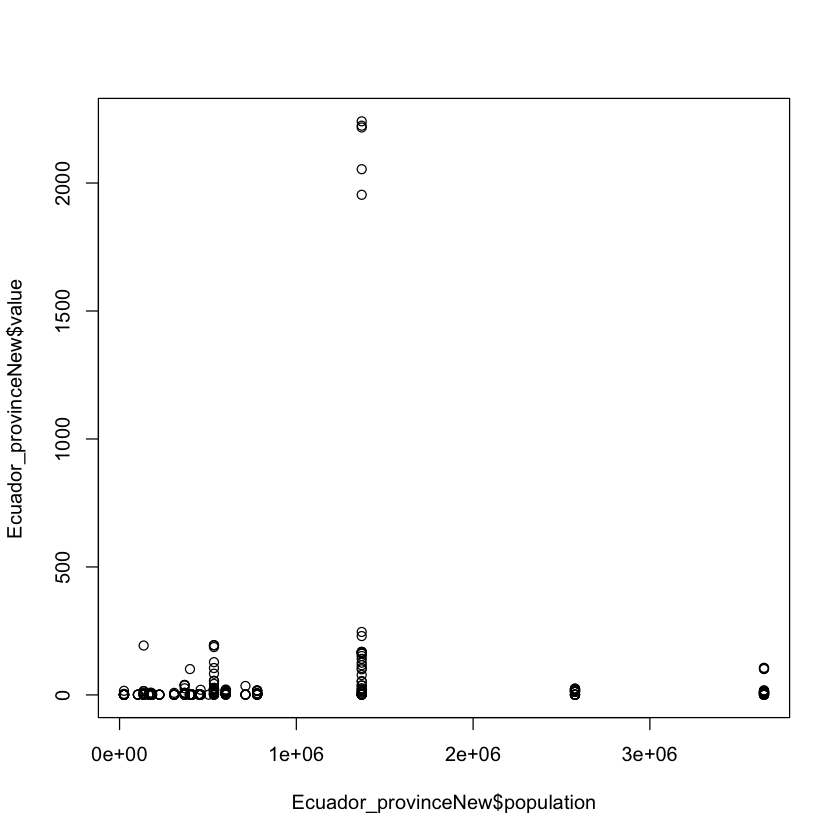

In [10]:
plot(Ecuador_provinceNew$distance,Ecuador_provinceNew$value)
plot(Ecuador_provinceNew$population,Ecuador_provinceNew$value)

In [11]:
Ecuador_provinceNew2 <- data.frame(Ecuador_provinceNew,State_of_emergency=rep(0,379))
Ecuador_provinceNew2[Ecuador_province$location2=="Sucumbios",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Santo_Domingo_de_los_Tsachilas",]$State_of_emergency<-1
Ecuador_provinceNew2[Ecuador_province$location2=="Santa_Elena",]$State_of_emergency<-1
Ecuador_provinceNew2[Ecuador_province$location2=="Pichincha",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Orellana",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Manabi",]$State_of_emergency<-1
Ecuador_provinceNew2[Ecuador_province$location2=="Los_Rios",]$State_of_emergency<-1
Ecuador_provinceNew2[Ecuador_province$location2=="Guayas",]$State_of_emergency<-1
Ecuador_provinceNew2[Ecuador_province$location2=="Galapagos",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Esmeraldas",]$State_of_emergency<-1
Ecuador_provinceNew2[Ecuador_province$location2=="El_Oro",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Cotopaxi",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Bolivar",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Canar",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Loja",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Napo",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Carchi",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Imbabura",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Chimborazo",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Tungurahua",]$State_of_emergency<-0
Ecuador_provinceNew2[Ecuador_province$location2=="Azuay",]$State_of_emergency<-0

In [12]:
lm4<-lm(value~State_of_emergency,data=subset(Ecuador_provinceNew2,data_field_code %in% c("EC0001")))
summary(lm4)


Call:
lm(formula = value ~ State_of_emergency, data = subset(Ecuador_provinceNew2, 
    data_field_code %in% c("EC0001")))

Residuals:
    Min      1Q  Median      3Q     Max 
-26.340 -11.340  -4.282  -0.282 218.660 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.282      3.408   1.550    0.123    
State_of_emergency   22.057      5.499   4.011 9.93e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.42 on 136 degrees of freedom
Multiple R-squared:  0.1058,	Adjusted R-squared:  0.0992 
F-statistic: 16.09 on 1 and 136 DF,  p-value: 9.935e-05


In [13]:
head(Ecuador_province)

report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit,time,long,lat,Earth_long,Earth_lat,distance,location2
2016-03-30,Ecuador-Sucumbios,province,total_zika_suspected_cumulative,EC0001,NA,NA,1,cases,2016-03-30,-76.88976,0.0889231,-79.94,0.371,211.87399,Sucumbios
2016-03-30,Ecuador-Santo_Domingo_de_los_Tsachilas,province,total_zika_suspected_cumulative,EC0001,NA,NA,1,cases,2016-03-30,-79.18794,-0.2521882,-79.94,0.371,67.37569,Santo_Domingo_de_los_Tsachilas
2016-03-30,Ecuador-Santa_Elena,province,total_zika_suspected_cumulative,EC0001,NA,NA,8,cases,2016-03-30,-80.85950,-2.2267105,-79.94,0.371,189.47256,Santa_Elena
2016-03-30,Ecuador-Pichincha,province,total_zika_suspected_cumulative,EC0001,NA,NA,19,cases,2016-03-30,-78.47519,-0.1464847,-79.94,0.371,107.37849,Pichincha
2016-03-30,Ecuador-Orellana,province,total_zika_suspected_cumulative,EC0001,NA,NA,1,cases,2016-03-30,-76.99503,-0.4545163,-79.94,0.371,211.45307,Orellana
2016-03-30,Ecuador-Manabi,province,total_zika_suspected_cumulative,EC0001,NA,NA,9,cases,2016-03-30,-80.45264,-1.0543434,-79.94,0.371,104.15372,Manabi


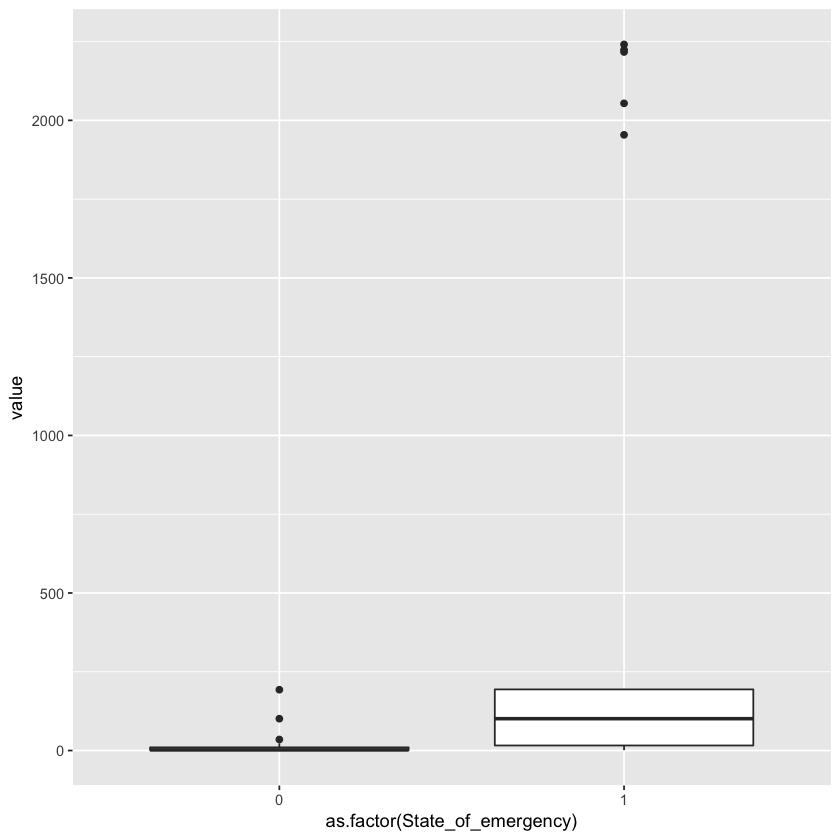

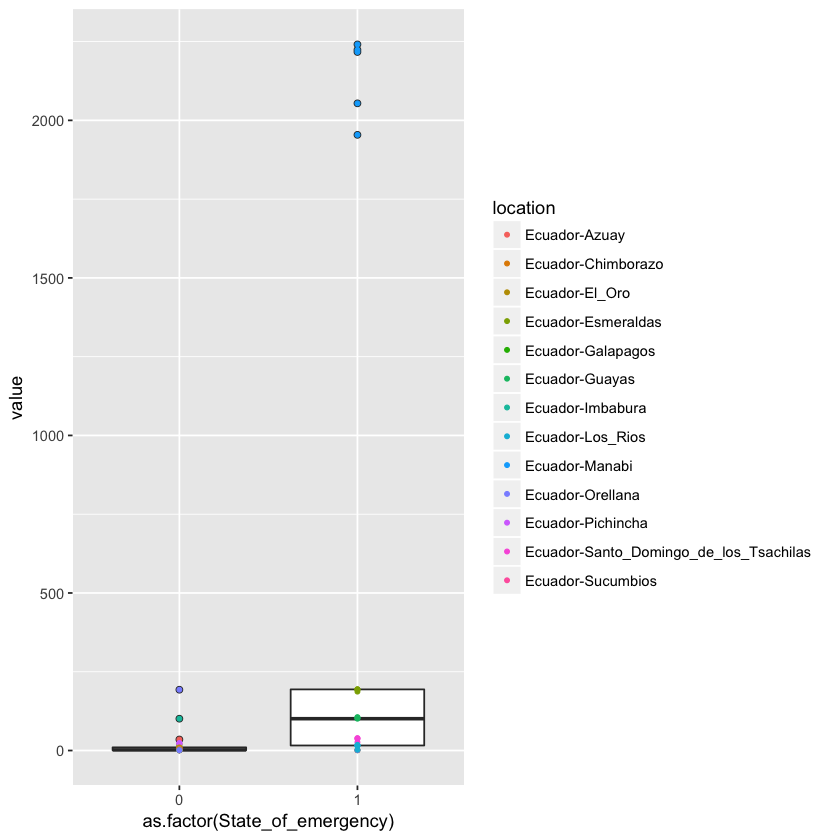

In [17]:
qplot(as.factor(State_of_emergency), value, data = subset(Ecuador_provinceNew2,data_field_code %in% c("EC0003")), geom = "boxplot")
ggplot(data = subset(Ecuador_provinceNew2,data_field_code %in% c("EC0003")),aes(x=as.factor(State_of_emergency),y=value))+geom_boxplot()+ 
    geom_point(aes(colour=location),size=1)

In [16]:
Ecuador_provinceNew3 <- data.frame(Ecuador_provinceNew,elevation=rep(0,379))
Ecuador_provinceNew3[Ecuador_province$location2=="Sucumbios",]$elevation<-248
Ecuador_provinceNew3[Ecuador_province$location2=="Santo_Domingo_de_los_Tsachilas",]$elevation<-540
Ecuador_provinceNew3[Ecuador_province$location2=="Santa_Elena",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Pichincha",]$elevation<-2787.1
Ecuador_provinceNew3[Ecuador_province$location2=="Orellana",]$elevation<-288
Ecuador_provinceNew3[Ecuador_province$location2=="Manabi",]$elevation<-210
Ecuador_provinceNew3[Ecuador_province$location2=="Los_Rios",]$elevation<-40.4
Ecuador_provinceNew3[Ecuador_province$location2=="Guayas",]$elevation<-24.4
Ecuador_provinceNew3[Ecuador_province$location2=="Galapagos",]$elevation<-62.2
Ecuador_provinceNew3[Ecuador_province$location2=="Esmeraldas",]$elevation<-819.1
Ecuador_provinceNew3[Ecuador_province$location2=="El_Oro",]$elevation<-9.7
Ecuador_provinceNew3[Ecuador_province$location2=="Cotopaxi",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Bolivar",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Canar",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Loja",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Napo",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Carchi",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Imbabura",]$elevation<-2064
Ecuador_provinceNew3[Ecuador_province$location2=="Chimborazo",]$elevation<-3268.2
Ecuador_provinceNew3[Ecuador_province$location2=="Tungurahua",]$elevation<-0
Ecuador_provinceNew3[Ecuador_province$location2=="Azuay",]$elevation<-2402.6